In [ ]:
from expectation.seqtest.sequential_e_testing import SequentialTest
from expectation.utils.helper_functions import plot_sequential_test

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Initialize variance test
variance_test = SequentialTest(
    test_type="variance",
    null_value=1,  # baseline variance
    alternative="greater"  # detecting variance increases
)


In [3]:
# Simulation parameters
n_batches = 40
batch_size = 5
change_point = 6  # when variance starts increasing


In [4]:
results = []
batch_variances = []

# Simulate process with increasing variance
for batch in range(n_batches):
    # Calculate current variance
    if batch < change_point:
        current_variance = 1.0
    else:
        current_variance = 1.0 + 0.1 * (batch - change_point)
    
    # Generate batch data
    batch_data = np.random.normal(0, np.sqrt(current_variance), size=batch_size)
    batch_variances.append(np.var(batch_data))
    
    # Update test
    result = variance_test.update(batch_data)
    
    results.append({
        'batch': batch + 1,
        'true_variance': current_variance,
        'sample_variance': np.var(batch_data),
        'e_value': result.e_value,
        'cumulative_e_value': result.e_process.cumulative_value,
        'reject_null': result.reject_null,
        'p_value': result.p_value
    })

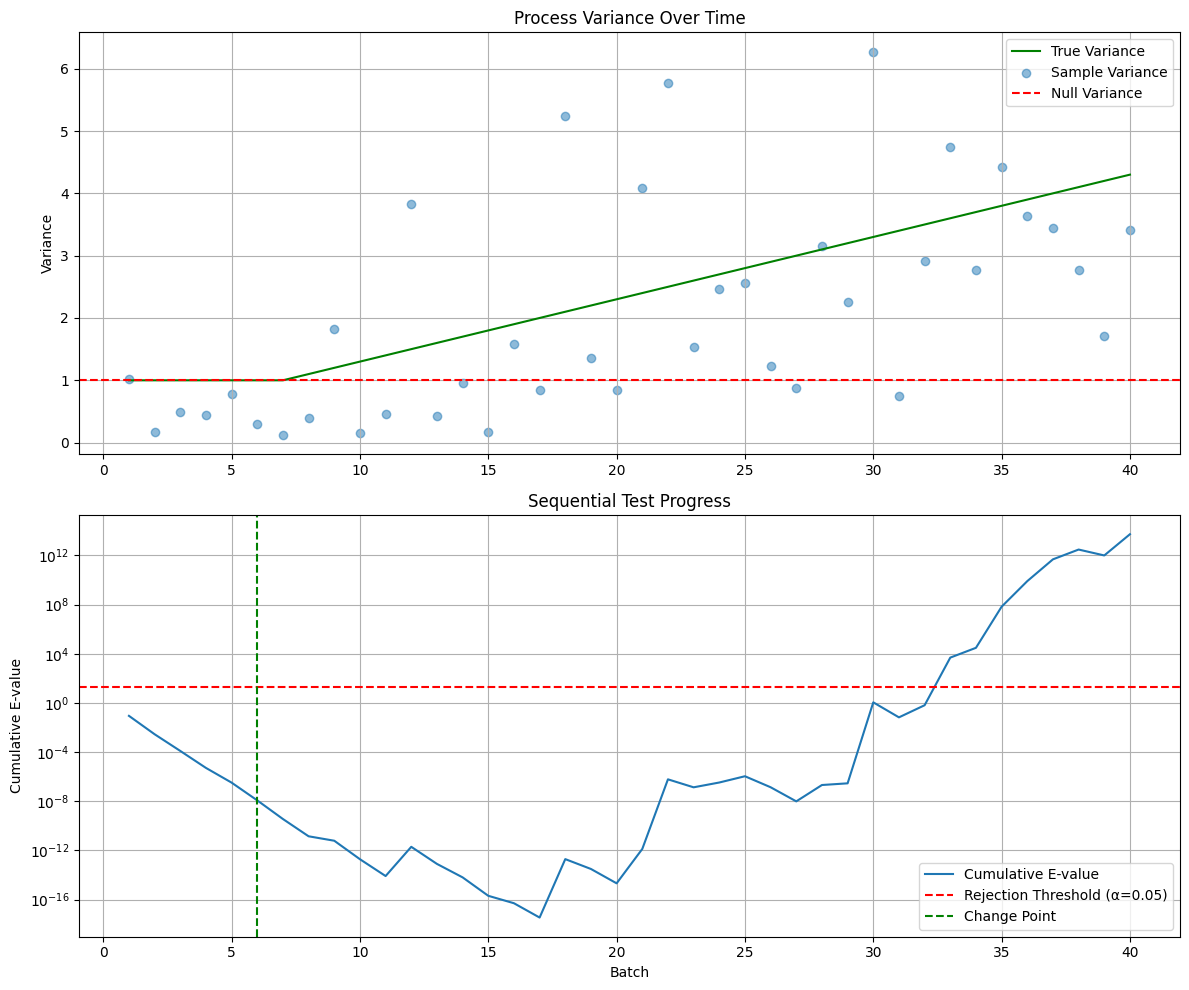


Variance Monitoring Summary:
Initial variance: 1.0
Final variance: 4.30
Variance increase detected at batch 33
Detection delay: 27 batches
Variance at detection: 3.60


In [5]:
# Visualization
history_df = pd.DataFrame(results)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Variance Evolution
ax1.plot(history_df['batch'], history_df['true_variance'], 
         label='True Variance', color='g')
ax1.scatter(history_df['batch'], history_df['sample_variance'], 
           alpha=0.5, label='Sample Variance')
ax1.axhline(y=1, color='r', linestyle='--', label='Null Variance')
ax1.set_title('Process Variance Over Time')
ax1.set_ylabel('Variance')
ax1.legend()
ax1.grid(True)

# Plot 2: Sequential Test Results
ax2.plot(history_df['batch'], history_df['cumulative_e_value'], 
         label='Cumulative E-value')
ax2.axhline(y=20, color='r', linestyle='--', 
            label='Rejection Threshold (α=0.05)')
ax2.axvline(x=change_point, color='g', linestyle='--', 
            label='Change Point')
ax2.set_title('Sequential Test Progress')
ax2.set_ylabel('Cumulative E-value')
ax2.set_xlabel('Batch')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Analysis summary
detection_batch = history_df[history_df['reject_null']].iloc[0]['batch'] \
    if any(history_df['reject_null']) else None

print("\nVariance Monitoring Summary:")
print(f"Initial variance: 1.0")
print(f"Final variance: {history_df['true_variance'].iloc[-1]:.2f}")
if detection_batch:
    print(f"Variance increase detected at batch {detection_batch}")
    print(f"Detection delay: {detection_batch - change_point} batches")
    print(f"Variance at detection: {history_df.loc[detection_batch-1, 'true_variance']:.2f}")
else:
    print("No significant variance increase detected")

(<Figure size 1500x1000 with 3 Axes>,
 (<Axes: title={'center': 'Individual E-values'}, xlabel='Step', ylabel='E-value'>,
  <Axes: title={'center': 'Cumulative E-values (E-Process)'}, xlabel='Step', ylabel='Cumulative E-value'>,
  <Axes: title={'center': 'Raw Observations'}, xlabel='Step', ylabel='Value'>))

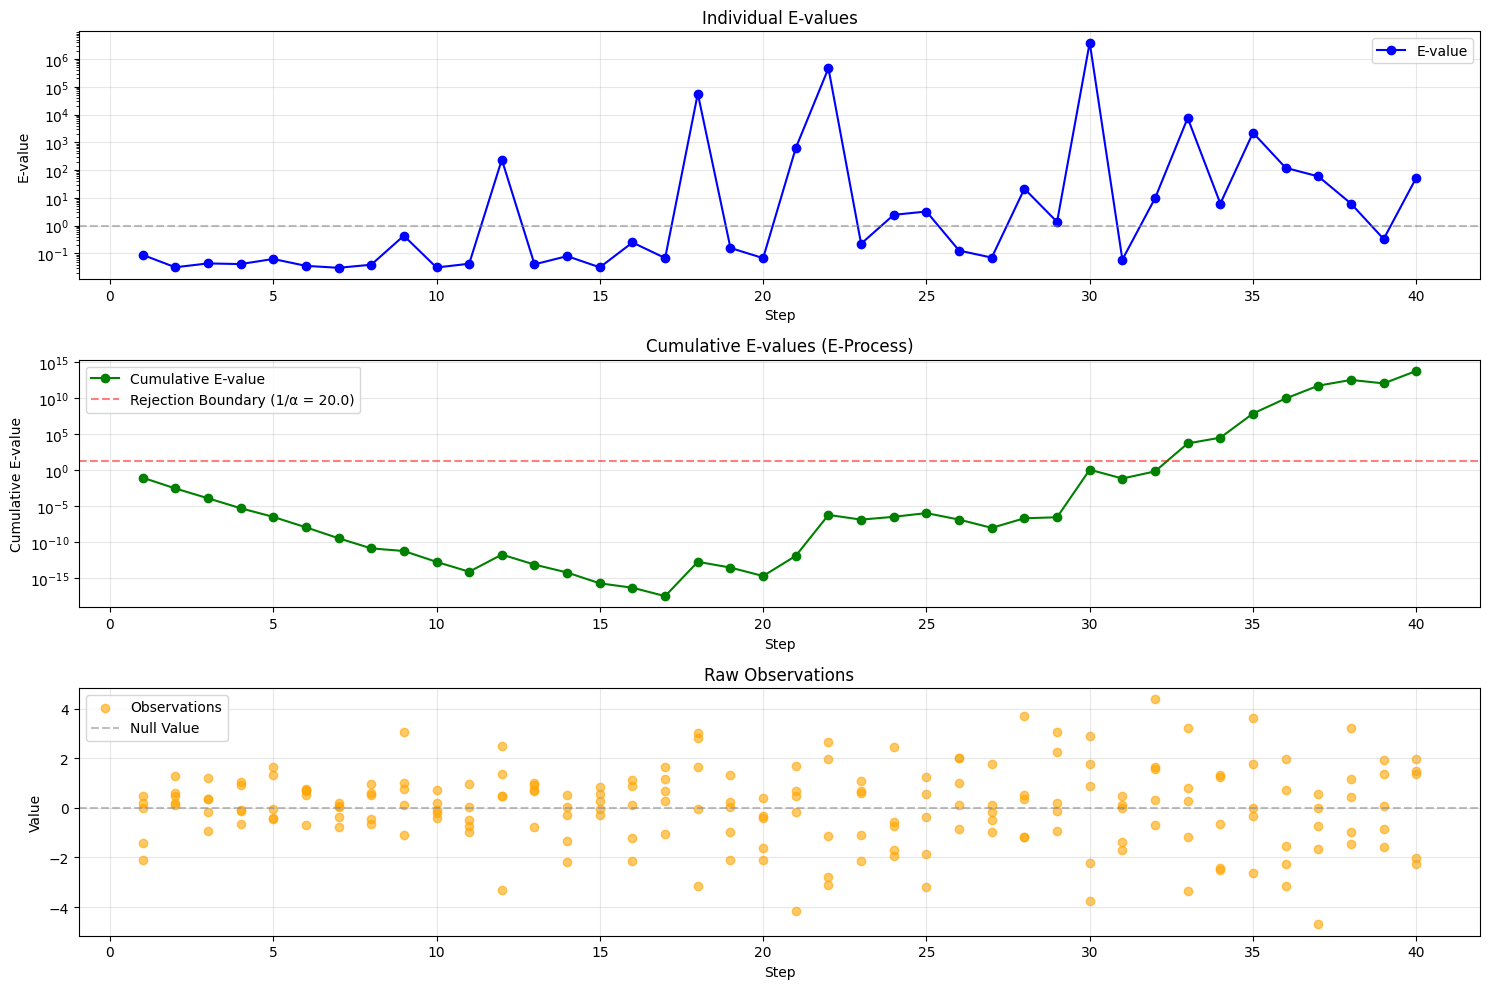

In [6]:
plot_sequential_test(variance_test.get_history_df(), log=True)